In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel("Aviation_KPIs_Dataset.xlsx")

In [3]:
df.head()

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,FL885,2024-05-20 11:51:21.328,2024-07-10 02:38:53.731,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84
1,FL930,2024-01-23 06:56:22.686,2024-07-07 02:53:44.150,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84
2,FL478,2024-05-30 09:18:38.578,2024-12-05 01:00:54.473,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61
3,FL637,2024-08-15 05:21:46.814,2024-09-21 13:23:41.615,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92
4,FL318,2024-07-25 15:29:58.467,2024-03-21 15:05:54.375,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50


In [4]:
df.isnull().sum()

Flight Number                       0
Scheduled Departure Time            0
Actual Departure Time               0
Delay (Minutes)                     0
Aircraft Utilization (Hours/Day)    0
Turnaround Time (Minutes)           0
Load Factor (%)                     0
Fleet Availability (%)              0
Maintenance Downtime (Hours)        0
Fuel Efficiency (ASK)               0
Revenue (USD)                       0
Operating Cost (USD)                0
Net Profit Margin (%)               0
Ancillary Revenue (USD)             0
Debt-to-Equity Ratio                0
Revenue per ASK                     0
Cost per ASK                        0
Profit (USD)                        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Flight Number                     200000 non-null  object        
 1   Scheduled Departure Time          200000 non-null  datetime64[ns]
 2   Actual Departure Time             200000 non-null  datetime64[ns]
 3   Delay (Minutes)                   200000 non-null  int64         
 4   Aircraft Utilization (Hours/Day)  200000 non-null  float64       
 5   Turnaround Time (Minutes)         200000 non-null  int64         
 6   Load Factor (%)                   200000 non-null  float64       
 7   Fleet Availability (%)            200000 non-null  float64       
 8   Maintenance Downtime (Hours)      200000 non-null  float64       
 9   Fuel Efficiency (ASK)             200000 non-null  float64       
 10  Revenue (USD)                   

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

In [7]:
missing_values[missing_values > 0]

Series([], dtype: int64)

In [8]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Identify numerical columns (excluding target variable)
numerical_cols = df.select_dtypes(include=["number"]).columns.tolist()
numerical_cols.remove("Profit (USD)")

# Display categorical columns
categorical_cols


['Flight Number']

In [9]:
from sklearn.preprocessing import StandardScaler

# Drop 'Flight Number' as it's not relevant for prediction
df.drop(columns=["Flight Number"], inplace=True)

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the processed dataset
df.head()


,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,2024-05-20 11:51:21.328,2024-07-10 02:38:53.731,-0.269895,0.154225,1.560886,0.289682,1.295908,1.425044,0.754694,-1.032434,0.655562,0.499943,-1.054485,0.982453,-1.046917,0.117414,-16893.84
1,2024-01-23 06:56:22.686,2024-07-07 02:53:44.150,-0.933179,1.092823,0.329063,1.633925,-0.520200,-1.519693,0.500448,0.425597,-1.667016,-1.265275,0.276672,1.579516,0.044761,-1.477642,30032.84
2,2024-05-30 09:18:38.578,2024-12-05 01:00:54.473,1.402735,-0.550804,0.483041,-0.523374,1.487320,-1.323634,0.881816,-0.838450,0.889496,-1.587167,-0.445154,-0.572687,-0.930368,0.230661,-16794.61
3,2024-08-15 05:21:46.814,2024-09-21 13:23:41.615,0.133844,1.339367,0.944974,-0.414643,-0.557099,0.517788,0.731580,1.012931,-0.617239,1.571187,0.436802,-1.600191,0.373072,-0.755653,26468.92
4,2024-07-25 15:29:58.467,2024-03-21 15:05:54.375,-0.846664,0.630012,1.522391,-1.706252,-0.319563,0.690782,1.702335,-0.991630,1.258351,-1.355266,-1.364803,-1.266947,-1.111449,0.184476,-23137.50


In [10]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=["Profit (USD)"])
y = df["Profit (USD)"]

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset sizes
X_train.shape, X_test.shape


((160000, 16), (40000, 16))

In [12]:
# Convert datetime columns into numerical values
datetime_cols = X_train.select_dtypes(include=['datetime64']).columns

for col in datetime_cols:
    X_train[col + '_year'] = X_train[col].dt.year
    X_train[col + '_month'] = X_train[col].dt.month
    X_train[col + '_day'] = X_train[col].dt.day
    X_train[col + '_hour'] = X_train[col].dt.hour

    X_test[col + '_year'] = X_test[col].dt.year
    X_test[col + '_month'] = X_test[col].dt.month
    X_test[col + '_day'] = X_test[col].dt.day
    X_test[col + '_hour'] = X_test[col].dt.hour

# Drop original datetime columns
X_train = X_train.drop(columns=datetime_cols)
X_test = X_test.drop(columns=datetime_cols)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate model performance
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Display results
mae_lr, mse_lr, r2_lr


(3.620043798058248e-11, 2.0311667552634475e-21, 1.0)

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display results
mae_rf, mse_rf, r2_rf


(41.34478797999992, 2876.701858947099, 0.9999911781644152)

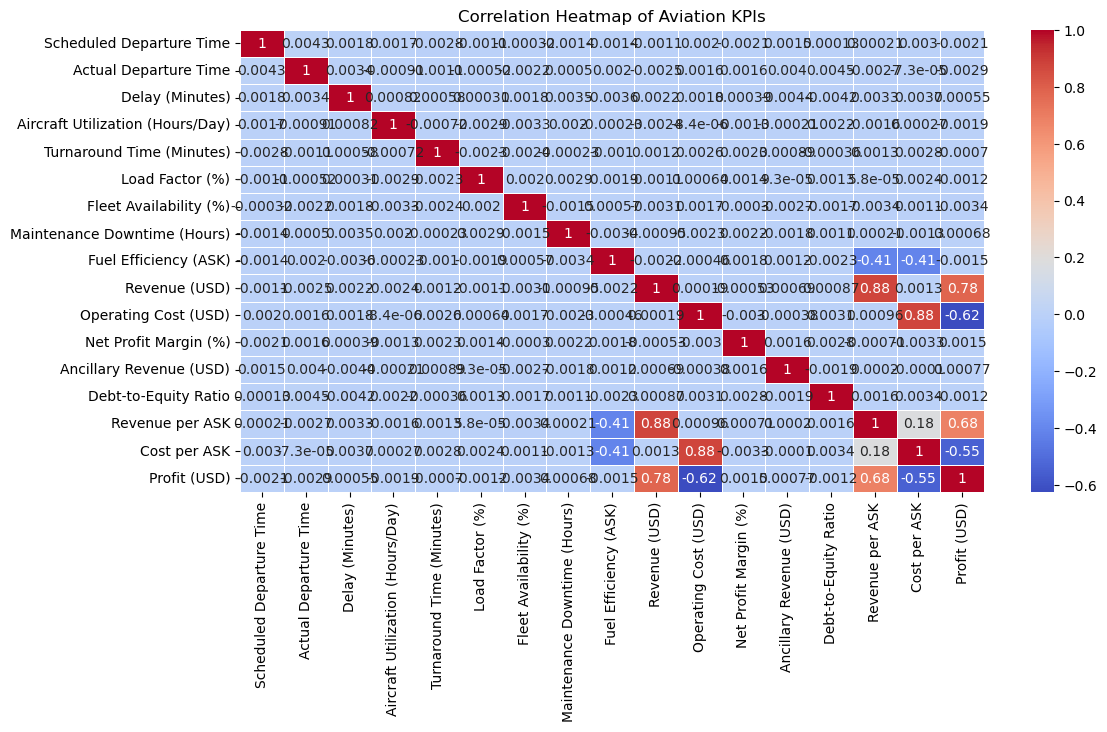

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Aviation KPIs")
plt.show()


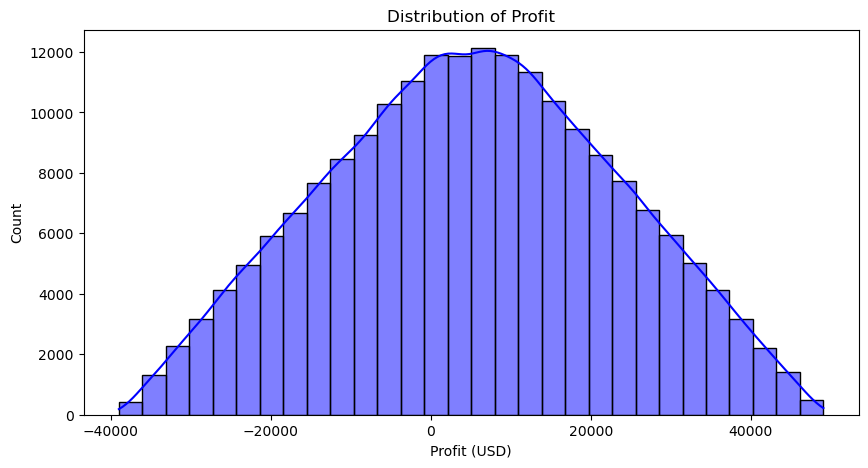

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Profit (USD)"], bins=30, kde=True, color="blue")
plt.title("Distribution of Profit")
plt.xlabel("Profit (USD)")
plt.ylabel("Count")
plt.show()


C:\Users\shrad\AppData\Local\Temp\ipykernel_8908\1980699074.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df["Feature"], y=feature_importance_df["Importance"], palette="coolwarm")


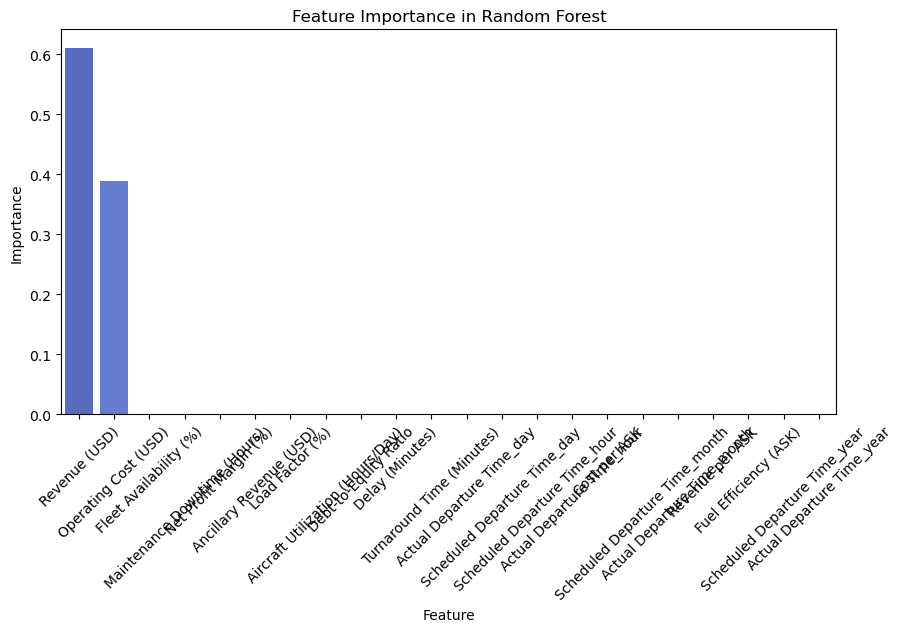

In [21]:
# Check Feature Importance (for Random Forest)
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance_df["Feature"], y=feature_importance_df["Importance"], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Feature Importance in Random Forest")
plt.show()


In [23]:
# Try Regularization (Ridge or Lasso Regression)
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE (Ridge):", mean_absolute_error(y_test, y_pred_ridge))
print("MSE (Ridge):", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score (Ridge):", r2_score(y_test, y_pred_ridge))


MAE (Ridge): 0.31298439174206916
MSE (Ridge): 0.19020979575465605
R2 Score (Ridge): 0.9999999994166933


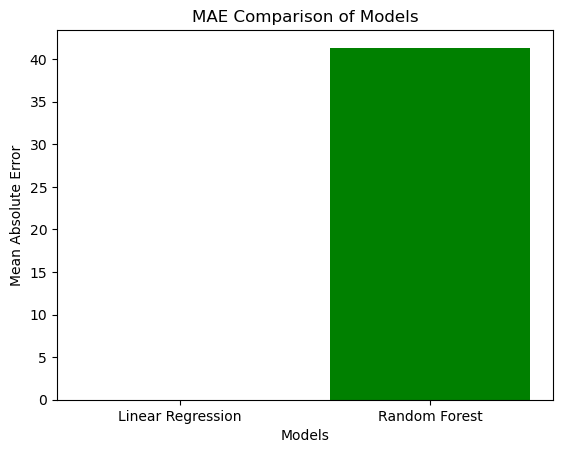

In [24]:
# Bar Chart for MAE Comparison
models = ['Linear Regression', 'Random Forest']
mae_values = [3.62e-11, 41.34]

plt.bar(models, mae_values, color=['blue', 'green'])
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error")
plt.title("MAE Comparison of Models")
plt.show()


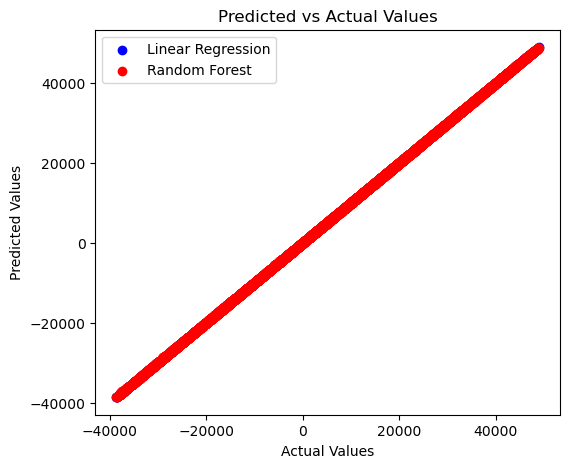

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Predicted vs Actual Values")
plt.show()
